In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
df['Gender']=df['Gender'].fillna('Male')

In [7]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
df['Married']=df['Married'].fillna('Yes')

In [9]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df['Dependents']=df['Dependents'].fillna('0')

In [11]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df['Self_Employed']=df['Self_Employed'].fillna("No")

In [13]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [14]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [15]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [17]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


<AxesSubplot:>

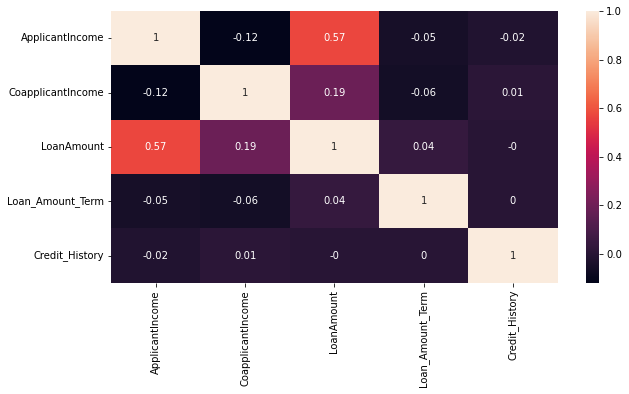

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.corr(),2),annot=True)

In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [28]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [30]:
df['Married']=df['Married'].map({'Yes':1,'No':0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [31]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,1,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [33]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,1,3,1,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,1,1,1,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,1,2,1,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [34]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})

In [35]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [36]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [37]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [38]:
df.drop('Loan_ID',inplace=True,axis=1)

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [40]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

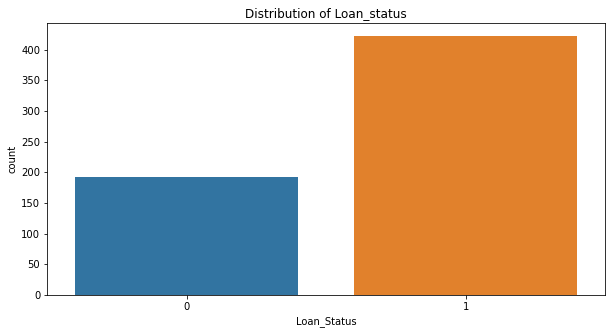

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',data=df)
plt.title("Distribution of Loan_status")
plt.show()

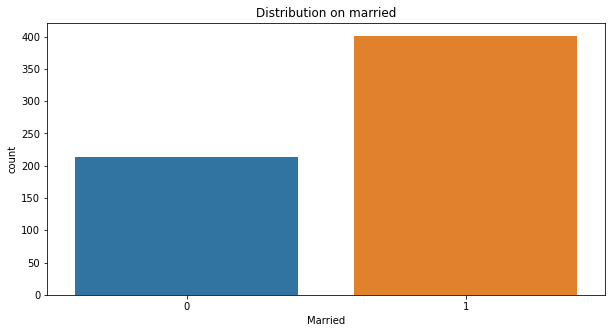

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='Married',data=df)
plt.title("Distribution on married")
plt.show()

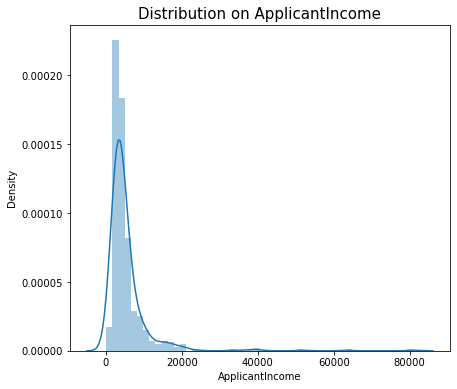

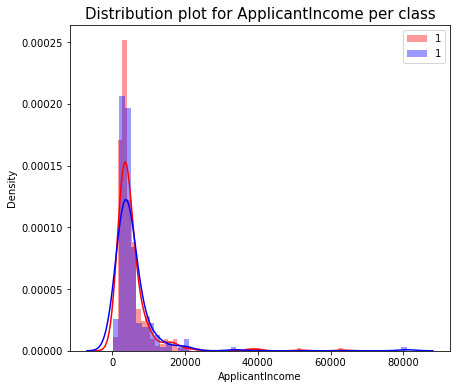

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])
plt.title("Distribution on ApplicantIncome",fontsize=15)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.distplot(df[df['Loan_Status']==1]['ApplicantIncome'],label=1,color='red')
sns.distplot(df[df['Loan_Status']==0]['ApplicantIncome'],label=1,color='blue')
plt.legend()
plt.title("Distribution plot for ApplicantIncome per class",fontsize=15)
plt.show()

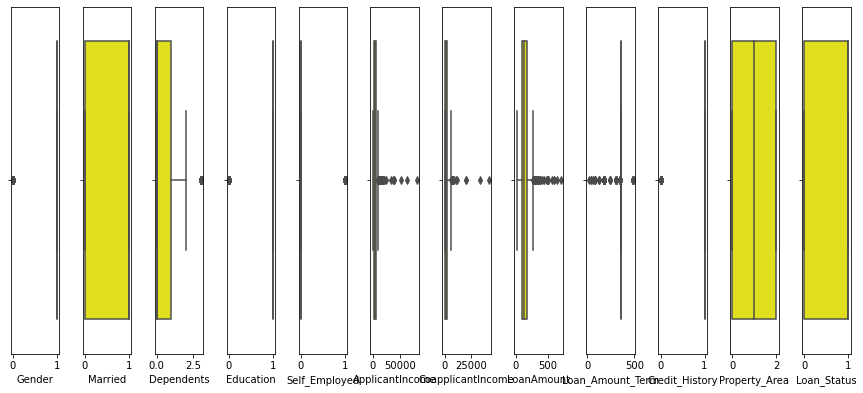

In [44]:
collist=df.columns.values
ncol=36
nrow=20
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="yellow",orient='h')
    plt.tight_layout()

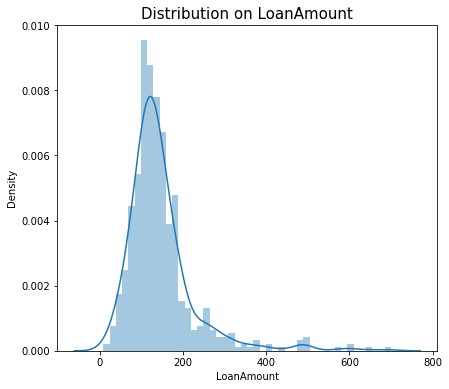

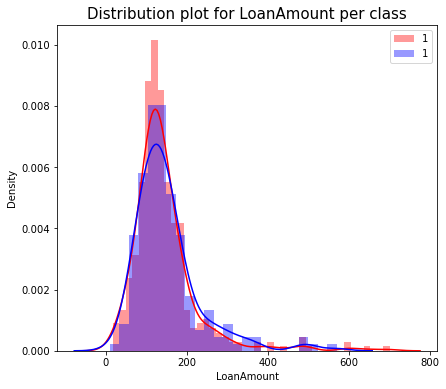

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])
plt.title("Distribution on LoanAmount",fontsize=15)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.distplot(df[df['Loan_Status']==1]['LoanAmount'],label=1,color='red')
sns.distplot(df[df['Loan_Status']==0]['LoanAmount'],label=1,color='blue')
plt.legend()
plt.title("Distribution plot for LoanAmount per class",fontsize=15)
plt.show()

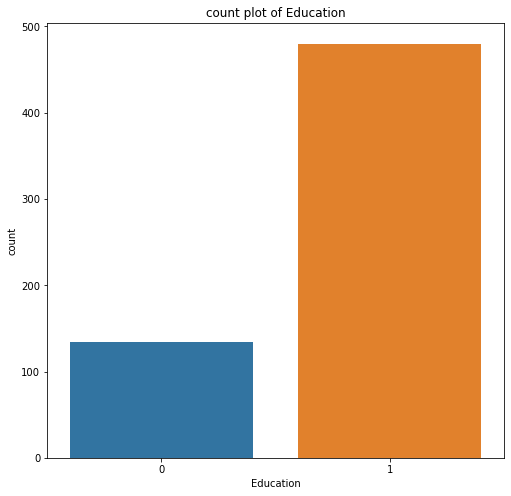

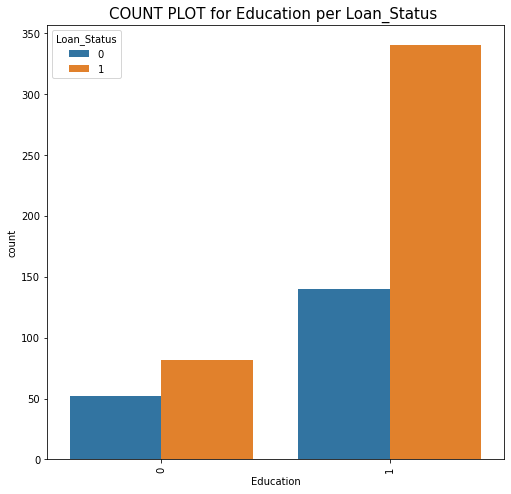

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(df['Education'])
plt.title("count plot of Education")
plt.show()

plt.figure(figsize=(18,8))
plt.subplot(1,2,2)
sns.countplot(data=df,x=df['Education'],hue=df['Loan_Status'])
plt.title("COUNT PLOT for Education per Loan_Status ",fontsize=15)
plt.xticks(rotation=90)
plt.show()

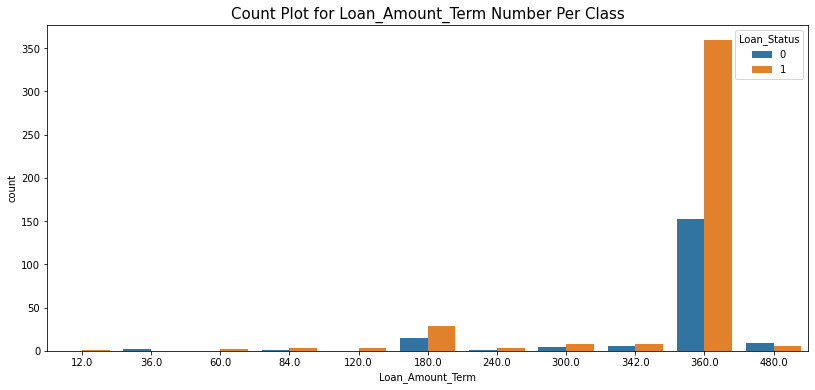

In [47]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.countplot(x='Loan_Amount_Term', data=df, hue='Loan_Status')
plt.title("Count Plot for Loan_Amount_Term Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

Text(0.5, 1.0, 'countplot for gender per income')

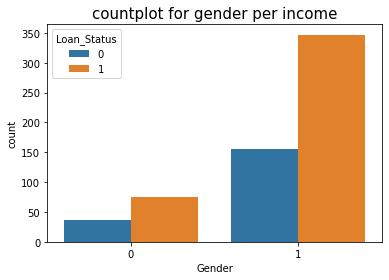

In [48]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('countplot for gender per income',fontsize=15)

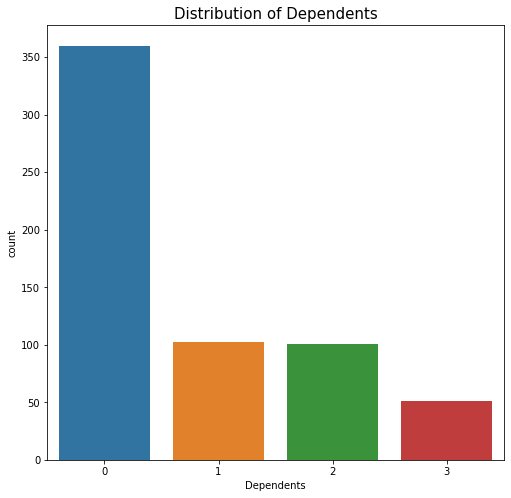

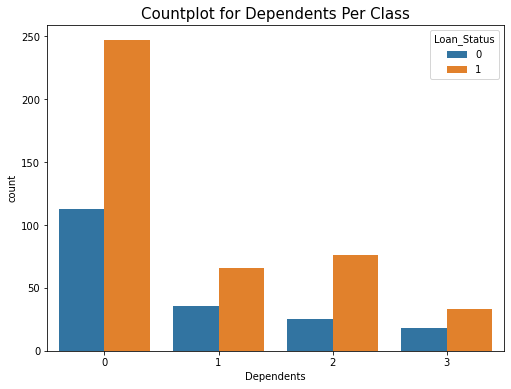

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(df['Dependents'])
plt.title('Distribution of Dependents',fontsize=15)

plt.figure(figsize=(18,6))
plt.subplot(1,2,2)
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.title('Countplot for Dependents Per Class', fontsize = 15)
plt.show()

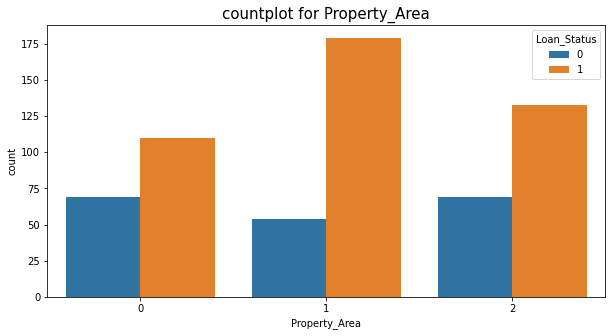

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
plt.title('countplot for Property_Area',fontsize=15)
plt.show()

In [51]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


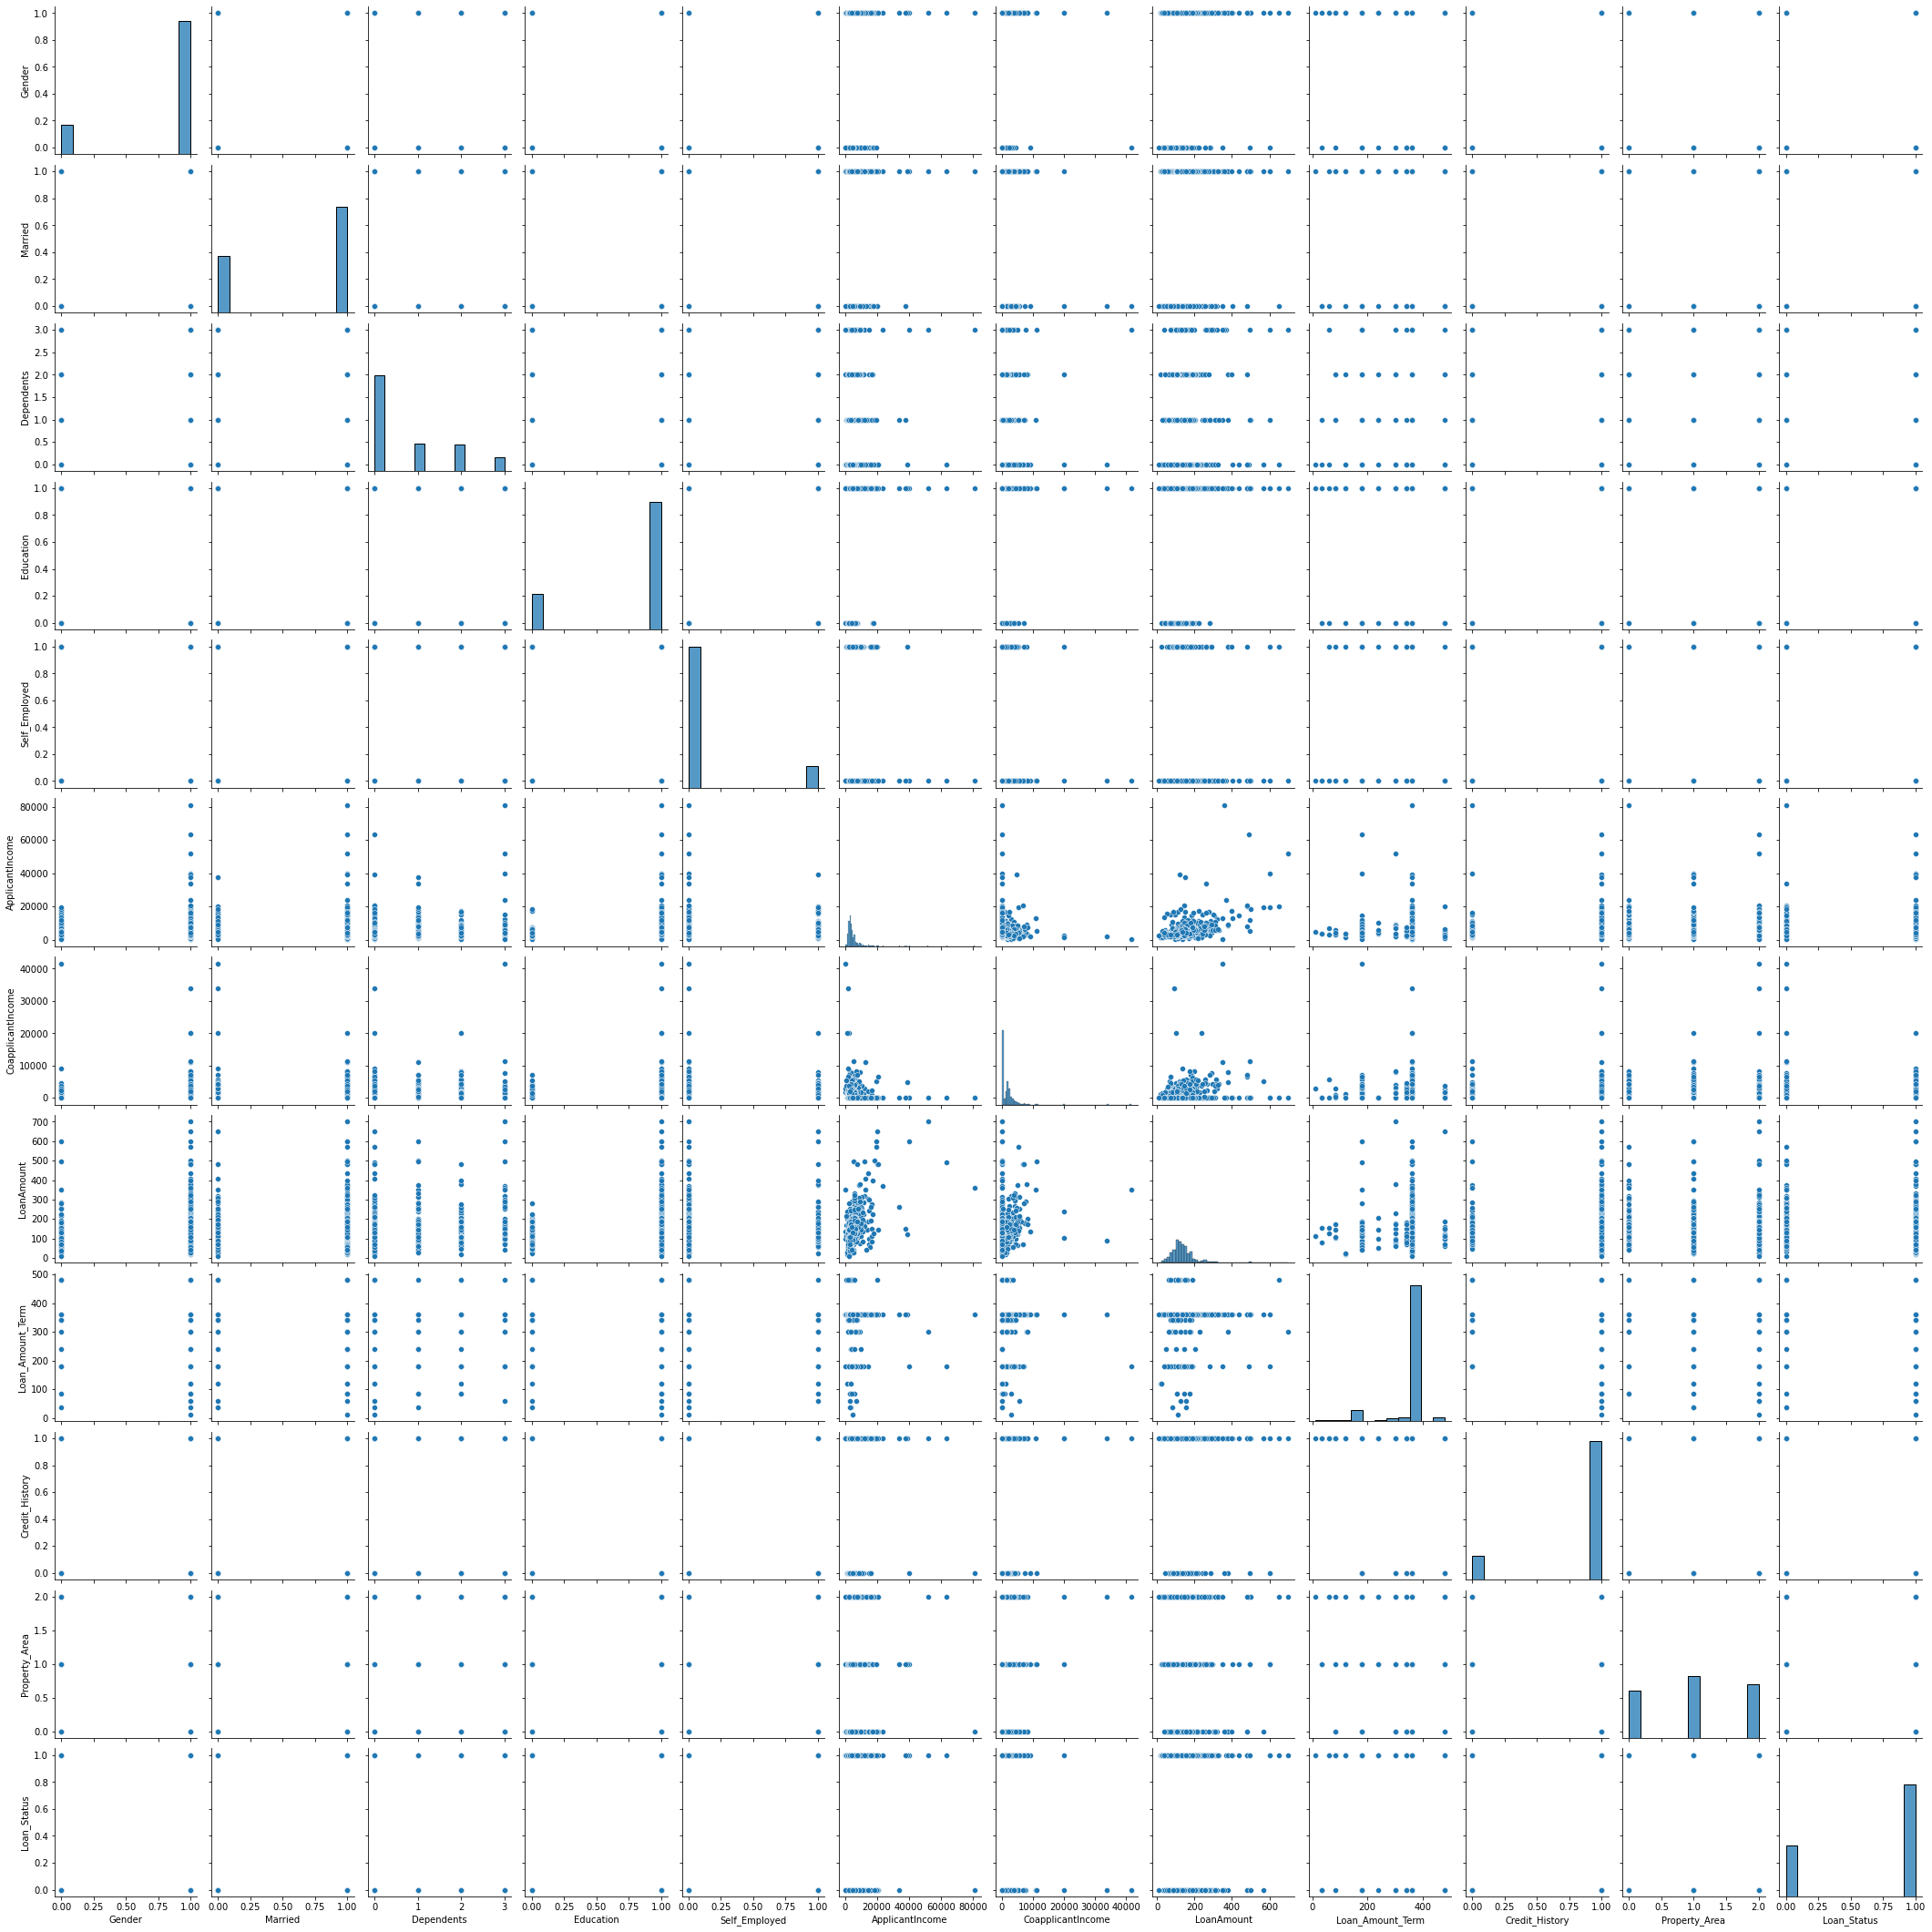

In [52]:
sns.pairplot(df)

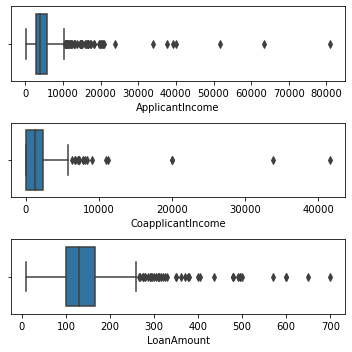

In [53]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['ApplicantIncome'], ax = axs[0])
plt2 = sns.boxplot(df['CoapplicantIncome'], ax = axs[1])
plt3 = sns.boxplot(df['LoanAmount'], ax = axs[2])
plt.tight_layout()

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(614, 12)

In [55]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print('total_droped_rows',df.shape[0] - df_new.shape[0])

old dataframe (614, 12)
new dataframe (577, 12)
total_droped_rows 37


In [57]:
loss_percentage=(37/614)*100
loss_percentage

6.026058631921824

In [58]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [59]:
x=df_new.drop(['Loan_Status'],axis=1)
y=df_new['Loan_Status']

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.23940793,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23940793,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.23940793,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23940793,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.23940793,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.23940793,
        -2.38941464, -0.03952504]])

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0)

In [62]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (461, 11)
x_test shape: (116, 11)
y_train shape: (461,)
y_test shape: (116,)


In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [64]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [65]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7931034482758621
F1 score: 0.8636363636363635
[[16 23]
 [ 1 76]]
              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.77      0.99      0.86        77

    accuracy                           0.79       116
   macro avg       0.85      0.70      0.72       116
weighted avg       0.83      0.79      0.77       116



In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [67]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7758620689655172
F1 score: 0.8505747126436781
[[16 23]
 [ 3 74]]
              precision    recall  f1-score   support

           0       0.84      0.41      0.55        39
           1       0.76      0.96      0.85        77

    accuracy                           0.78       116
   macro avg       0.80      0.69      0.70       116
weighted avg       0.79      0.78      0.75       116



In [68]:
from sklearn.svm import SVC
svc = SVC(random_state=7)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [69]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7844827586206896
F1 score: 0.8571428571428571
[[16 23]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.77      0.97      0.86        77

    accuracy                           0.78       116
   macro avg       0.83      0.69      0.71       116
weighted avg       0.81      0.78      0.76       116



In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [71]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7844827586206896
F1 score: 0.8571428571428571
[[16 23]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.77      0.97      0.86        77

    accuracy                           0.78       116
   macro avg       0.83      0.69      0.71       116
weighted avg       0.81      0.78      0.76       116



In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=7)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [73]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7155172413793104
F1 score: 0.7870967741935484
[[22 17]
 [16 61]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        39
           1       0.78      0.79      0.79        77

    accuracy                           0.72       116
   macro avg       0.68      0.68      0.68       116
weighted avg       0.71      0.72      0.71       116



In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=7)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [75]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7672413793103449
F1 score: 0.8439306358381503
[[16 23]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.80      0.41      0.54        39
           1       0.76      0.95      0.84        77

    accuracy                           0.77       116
   macro avg       0.78      0.68      0.69       116
weighted avg       0.77      0.77      0.74       116



In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [77]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7672413793103449
F1 score: 0.8402366863905326
[[18 21]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        39
           1       0.77      0.92      0.84        77

    accuracy                           0.77       116
   macro avg       0.76      0.69      0.71       116
weighted avg       0.76      0.77      0.75       116



In [78]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print('F1 score:', f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 75.86206896551724
F1 score: 0.8352941176470589
[[17 22]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.74      0.44      0.55        39
           1       0.76      0.92      0.84        77

    accuracy                           0.76       116
   macro avg       0.75      0.68      0.69       116
weighted avg       0.76      0.76      0.74       116



In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [80]:
clf = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB()
      ,XGBClassifier(),AdaBoostClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], x , y, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",clf[i],":",round(np.mean(score)*100,2))

model_fit()

Score of Model LogisticRegression() : 81.83
Score of Model KNeighborsClassifier(n_neighbors=13) : 80.1
Score of Model DecisionTreeClassifier() : 72.28
Score of Model RandomForestClassifier(n_estimators=13) : 79.56
Score of Model GaussianNB() : 81.83
Score of Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None,

In [81]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-2,2,100), "penalty":["l1","l2"]}

In [82]:
GSCV=GridSearchCV(lr,grid,cv=k_fold,scoring="accuracy", n_jobs= 4)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [83]:
GSCV_pred=GSCV.best_estimator_.predict(x_test)
print("best score:",accuracy_score(y_test,GSCV_pred)*100)

best score: 79.3103448275862


In [87]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
GSGNB = GridSearchCV(nb, parameters, cv=5, verbose=1,scoring='accuracy')

In [88]:
GSGNB.fit(x_train,y_train)
GSGNB.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'var_smoothing': 0.01}

In [89]:
GSGNB_pred=GSGNB.best_estimator_.predict(x_test)
print("best score:",accuracy_score(y_test,GSGNB_pred)*100)

best score: 78.44827586206897


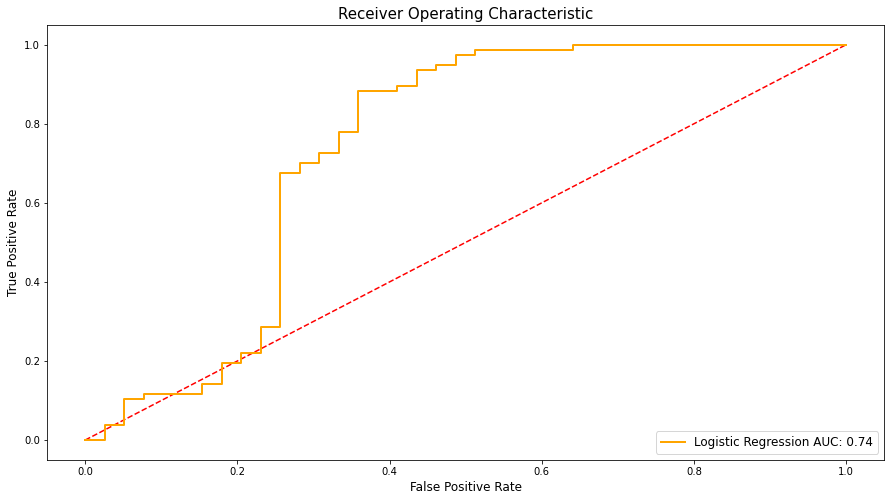

In [90]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = lr.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'Logistic Regression' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)
    
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

In [ ]:
import joblib
joblib.dump(GSCV.best_estimator_,"Loan Application Status Prediction.pkl")